# Lasso, Ridge et ElasticNet


Suite à la question de Michel : une visualisation de ce qu'il se passe dans les régressions Lasso, Ridge et ElasticNet.


Pour rappel : 

- **Régression linéaire** : 

    $$
    J(\theta) = \|y - X\theta\|^2_2
    $$



- **Lasso** (pénalisation  L1): 


    $$
    J(\theta) = \|y - X\theta\|^2_2 + \lambda \|\theta\|_1
    $$


- **Ridge** (pénalisation L2):

    $$
    J(\theta) = \|y - X\theta\|^2_2 + \alpha \|\theta\|^2_2
    $$


- **ElasticNet** (pénalisation L1 et L2):

    $$
    J(\theta) = \|y - X\theta\|^2_2 + \alpha \|\theta\|^2_2 + \lambda \|\theta\|_1
    $$


Ces régressions linéaires pénalisées sont composées d'un terme d'erreur issu des données ($\|y - X\theta\|^2_2$, *data penalty*) et d'un terme de pénalisation des coefficients.

> Moyen mnémotechnique : **R**idge pour **R**éduction des coefficients, **L**asso pour le lasso qui attrape les variables non pertinentes.

La régression Lasso sélectionne des variables et donne donc des modèles **parcimonieux** (*sparse en anglais*) ce qui est désirable : cf. le rasoir d'Ockham, pour deux modèles à explication équivalente, toujours préférer le modèle qui a le moins d'hypothèse (**K**eep **I**t **S**tupid **S**imple en développement logiciel ...)

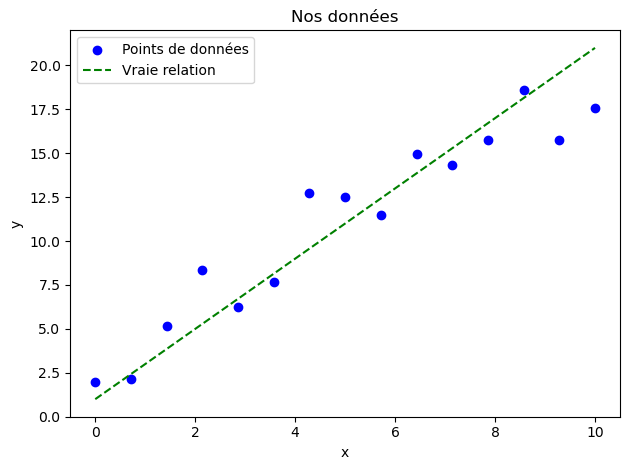

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 10, 15)
np.random.seed(42)
noise = np.random.normal(0, 2, 15)
true_b0, true_b1 = 1, 2
y = true_b1 * X + true_b0 + noise

plt.scatter(X, y, color="blue", label="Points de données")
plt.plot(X, y-noise, color="green", linestyle="--", label="Vraie relation")
plt.title("Nos données")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()

## Fonctions de coût simples

### De la partie *data penalty*

On a à faire à une fonction quadratique (une parabole en 2D), convexe.

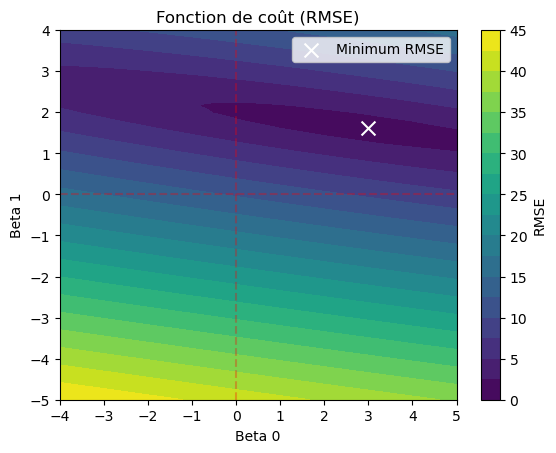

In [2]:
betas_0 = np.linspace(-4, 5, 50)
betas_1 = np.linspace(-5, 4, 50)

B0, B1 = np.meshgrid(betas_0, betas_1)

y_preds = B0[..., np.newaxis] + B1[..., np.newaxis] * X
Z = np.sqrt(np.mean((y - y_preds)**2, axis=-1))

# get the argmin
min_idx = np.unravel_index(np.argmin(Z), Z.shape)

st = plt.contourf(B0, B1, Z, levels=20, cmap='viridis')
plt.axvline(0, color='red', linestyle='--',alpha=0.3)
plt.axhline(0, color='red', linestyle='--',alpha=0.3)
plt.scatter(B0[min_idx], B1[min_idx], color='white', marker='x', s=100, label='Minimum RMSE')
plt.colorbar(st, label='RMSE')
plt.xlabel('Beta 0')
plt.ylabel('Beta 1')
plt.legend()
plt.title('Fonction de coût (RMSE)');

### De la pénalisation L1

Le minimum de la pénalisation L1 se trouve aux coordonnées (0,0) car la fonction de coût est proportionnelle à la somme des valeurs absolues des coefficients.

In [ ]:
from ipywidgets import FloatSlider, interactive

lambdas = FloatSlider(value=0.1, min=0.1, max=10.0, step=0.1, description='Lambda:')

def plot_l1_cost_function(lambda_value):
    plt.figure(figsize=(8, 6))
    l1_cost = lambda_value * (np.abs(B0) + np.abs(B1))
    plt.axvline(0, color='red', linestyle='--',alpha=0.3)
    plt.axhline(0, color='red', linestyle='--',alpha=0.3)
    contour = plt.contourf(B0, B1, l1_cost, levels=20, cmap='viridis')
    plt.colorbar(contour, label='Pénalisation L1')
    argmin_idx = np.unravel_index(np.argmin(l1_cost), l1_cost.shape)
    plt.scatter(B0[argmin_idx], B1[argmin_idx], color='white', marker='x', s=100, label='Minimum Pénalisation L1')
    plt.xlabel('Beta 0')
    plt.ylabel('Beta 1')
    plt.title(f'Fonction de coût de la pénalisation L1 (Lambda={lambda_value})')
    plt.legend()
    plt.show()

interactive(plot_l1_cost_function, lambda_value=lambdas)


interactive(children=(FloatSlider(value=0.1, description='Lambda:', max=10.0, min=0.1), Output()), _dom_classe…

### De la pénalisation L2

Ici encore, le minimum de la pénalisation L2 se trouve aux coordonnées (0,0) car la fonction de coût est proportionnelle à la somme des carrés des coefficients.

In [4]:
from ipywidgets import FloatSlider, interactive

alphas = FloatSlider(value=0.1, min=0.1, max=10.0, step=0.1, description='Alpha:')

def plot_l2_cost_function(alpha_value):
    plt.figure(figsize=(8, 6))
    l2_cost = alpha_value * (B0**2 + B1**2)
    contour = plt.contourf(B0, B1, l2_cost, levels=20, cmap='viridis')
    plt.colorbar(contour, label='Pénalisation L2')
    argmin_idx = np.unravel_index(np.argmin(l2_cost), l2_cost.shape)
    plt.axvline(0, color='red', linestyle='--',alpha=0.3)
    plt.axhline(0, color='red', linestyle='--',alpha=0.3)
    plt.scatter(B0[argmin_idx], B1[argmin_idx], color='white', marker='x', s=100, label='Minimum Pénalisation L2')
    plt.xlabel('Beta 0')
    plt.ylabel('Beta 1')
    plt.title(f'Fonction de coût de la pénalisation L2 (Alpha={alpha_value})')
    plt.legend()
    plt.show()

interactive(plot_l2_cost_function, alpha_value=alphas)

interactive(children=(FloatSlider(value=0.1, description='Alpha:', max=10.0, min=0.1), Output()), _dom_classes…

### D'une pénalisation mixte l1 et l2 (ElasticNet)

Idem, observez comment les lignes de force se déforment en ajustant les hyperparamètres alpha et lambda.

In [5]:
alphas = FloatSlider(value=0.1, min=0.1, max=10.0, step=0.1, description='Alpha (L2):')
lambdas = FloatSlider(value=0.1, min=0.1, max=10.0, step=0.1, description='Lambda (L1):')

def plot_l1_l2_cost_function(alpha_value, lambda_value):
    plt.figure(figsize=(8, 6))
    l1_l2_cost = alpha_value * (B0**2 + B1**2) + lambda_value * (np.abs(B0) + np.abs(B1))
    contour = plt.contourf(B0, B1, l1_l2_cost, levels=20, cmap='viridis')
    plt.colorbar(contour, label='Pénalisation L2 & L1')
    argmin_idx = np.unravel_index(np.argmin(l1_l2_cost), l1_l2_cost.shape)
    plt.axvline(0, color='red', linestyle='--',alpha=0.3)
    plt.axhline(0, color='red', linestyle='--',alpha=0.3)
    plt.scatter(B0[argmin_idx], B1[argmin_idx], color='white', marker='x', s=100, label='Minimum Pénalisation L1 & L2')
    plt.xlabel('Beta 0')
    plt.ylabel('Beta 1')
    plt.title(f'Fonction de coût de la pénalisation L2 & L1 (Alpha={alpha_value}, Lambda={lambda_value})')
    plt.legend()
    plt.show()

interactive(plot_l1_l2_cost_function, alpha_value=alphas, lambda_value=lambdas)

interactive(children=(FloatSlider(value=0.1, description='Alpha (L2):', max=10.0, min=0.1), FloatSlider(value=…

## Fonctions de coût combinées

On a ici la forme de la fonction de coût totale, combinant la partie *data penalty* et les pénalisations L1 et L2.

Vous observez que le minimum de la fonction de coût totale ne se trouve plus aux coordonnées (0,0) mais à un autre endroit, en fonction des hyperparamètres alpha et lambda.

En particulier, le point a tendance à se rapprocher des axes lorsque la pénalisation L1 est plus forte (lambda élevé), ce qui correspond à la mise à zéro de certains coefficients (sélection de variables).

La pénalisation L2 (alpha élevé) tend à réduire la magnitude des coefficients sans les mettre à zéro, ce qui se traduit par un minimum plus proche de l'origine mais pas nécessairement sur les axes.

In [6]:
alphas = FloatSlider(value=0.1, min=0.1, max=10.0, step=0.1, description='Alpha (L2):')
lambdas = FloatSlider(value=0.1, min=0.1, max=10.0, step=0.1, description='Lambda (L1):')

def plot_l1_l2_cost_function(alpha_value, lambda_value):
    plt.figure(figsize=(8, 6))
    l1_l2_cost = alpha_value * (B0**2 + B1**2) + lambda_value * (np.abs(B0) + np.abs(B1))
    total_cost = Z + l1_l2_cost 
    contour = plt.contourf(B0, B1, total_cost, levels=20, cmap='viridis')
    plt.colorbar(contour, label='Pénalisation L2 & L1')
    argmin_idx = np.unravel_index(np.argmin(total_cost), total_cost.shape)
    plt.axvline(0, color='red', linestyle='--',alpha=0.3)
    plt.axhline(0, color='red', linestyle='--',alpha=0.3)
    plt.scatter(B0[argmin_idx], B1[argmin_idx], color='white', marker='x', s=100, label='Minimum Pénalisation L1 & L2')
    plt.xlabel('Beta 0')
    plt.ylabel('Beta 1')
    plt.title(f'Fonction de coût de la pénalisation L2 & L1 (Alpha={alpha_value:.2f}, Lambda={lambda_value:.2f})')
    plt.legend()
    plt.show()

interactive(plot_l1_l2_cost_function, alpha_value=alphas, lambda_value=lambdas)

interactive(children=(FloatSlider(value=0.1, description='Alpha (L2):', max=10.0, min=0.1), FloatSlider(value=…

## En pratique dans la vraie vie

- régulariser un modèle linéaire permet de diminuer sa complexité en réduisant l'impact de toutes les variables (ridge) ou en sélectionnant des variables (lasso)

- lasso induit des modèles sparse, plus interpétables mais la sélection peut être arbitraire
  
- ridge ne sélectionne pas de variables mais comme il réduit progressivement les coefficients, ses solutions sont plus stables

- elasticnet est un excellent compromis
  
- nous avons vu que la performance d'un modèle linéaire simple ne dépendait pas de l'échelle des X, ici puisque nous pénalisons les Beta, il faut standardiser les X pour faire une bonne régression régularisée :
    
    X1 grande échelle (10⁶) & X2 petite échelle (10¹)
  
  => B1 petit et B2 grand

  => B2 plus pénalisé par la régularisation que B1, sans fondements